[-0.05, -0.025, 0.0, 0.02500000000000001, 0.05, 0.075, 0.10000000000000002]


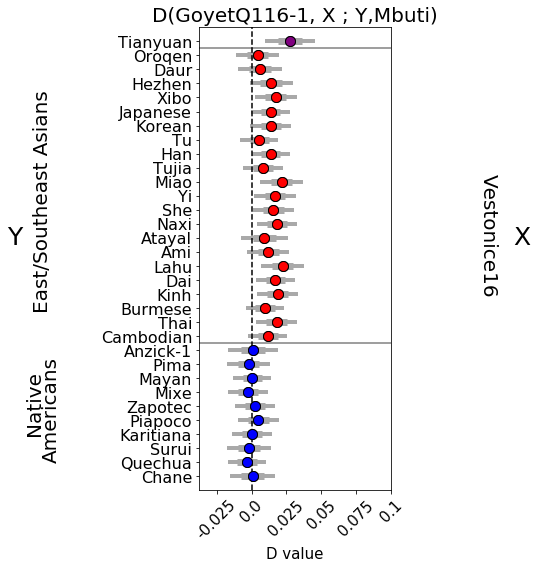

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import plotting_funcs as pf



pD = "/home/mel_yang/projects/allTYstuff/TY_Q116/"
fhs = ["UPA_all5"]
outs = ['Mbuti']

otherpops = ['TY','Ami', 'Atayal', 'Burmese', 'Cambodian', 'Dai', 'Daur', 
              'Han', 'Hezhen', 'Japanese', 'Kinh', 'Korean', 'Lahu', 
              'Miao', 'Naxi', 'Oroqen', 'She', 'Thai', 'Tu', 'Tujia', 
              'Xibo', 'Yi'] ##Remove Uygur
easpops = ['Oroqen', 'Daur', 'Hezhen', 'Xibo', 'Japanese', 
             'Korean', 'Tu', 'Han', 'Tujia', 'Miao', 'Yi', 'She', 
             'Naxi', 'Atayal', 'Ami', 'Lahu', 'Dai', 'Kinh', 
             'Burmese', 'Thai', 'Cambodian'] ##BY LATITUDE
namers = ['Clovis','Pima','Mayan','Mixe','Zapotec','Piapoco',
          'Karitiana','Surui','Quechua','Chane']
wantedpops = namers[::-1]+easpops[::-1]+['TY']
wantedcolors = ['blue']*len(namers)+['red']*len(easpops)+['purple']
#wantedpops[-1] = 'Tianyuan'
mynames=wantedpops[:]
mynames[mynames.index('Clovis')]='Anzick-1'
mynames[mynames.index('TY')]='Tianyuan'
fh="UPA_all5"
mytwoeurs = [['Kostenki14'],]
mytwoeurs = [['Vestonice16'],]
for myeurs in mytwoeurs:
    for out in outs:
        myset = "CS_GoyetQ116-1_NAmerAsn_%s" % out
        main = ("Tianyuan","TY")
        fig = plt.figure(figsize=(18,8))
        colors = ['red','blue','brown','black','orange']
        
        myxmins = [-0.03]*len(myeurs)
        myxmaxs = [0.08]*len(myeurs)
        mylabel = ['A','B','C','D','E']
        if 'Karelia' in myeurs: mylabel = ['F','G','H','I','J']
        mylabellocation = [-0.11]*len(myeurs)
        
        #labels = [('P3','D(%s,P2,X,%s)' % (main[0],out),'X=')]*len(myeurs)
        for mysubplot,myeur in enumerate(myeurs):
            ax1=fig.add_subplot(1,5,mysubplot+1)
            
            #myylabel,mytitle,legendadd = labels[mysubplot]
                
            mycond = True if 'tp' in myset else False
            myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+myset+'.Zmat',mycond)
            myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+myset+'.Dmat',mycond)
            #myZary=-myZary
            myDary=-myDary
            mySEary=myDary/myZary
            goodpops2 = [mypops2.index(i) for i in wantedpops]


            goodpops1 = mypops1.index(myeur)
            myys = np.array(range(len(goodpops2)))
            tyD = myDary[goodpops2,goodpops1]
            tySE = mySEary[goodpops2,goodpops1]
            for i in range(len(wantedpops)):
                #print tyD[i]
                ax1.errorbar(tyD[i],myys[i],xerr=tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
                ax1.errorbar(tyD[i],myys[i],xerr=2*tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
                ax1.plot(tyD[i],myys[i],'.')
            ax1.set_yticks(myys) #,rotation=45)
            if mysubplot==0:
                ax1.set_yticklabels(mynames,fontsize=16)
                #ax1.set_ylabel("P3",fontsize=20)
                ax1.text(-0.14,16.5,'Y',rotation = 0, fontsize=25)
                ax1.text(-0.125,26.5,'East/Southeast Asians',rotation = 90, fontsize=20)
                ax1.text(-0.13,6.5,'Native',rotation = 90, fontsize=20)
                ax1.text(-0.12,7.5,'Americans',rotation = 90, fontsize=20)

                #print mysubplot
                #ax2=ax1.twinx()
                #ax2.set_ylim(-1,len(goodpops2)) #,rotation=45)
                #ax2.set_yticks( myys )
                #ax2.set_yticklabels(['']*len(wantedpops),fontsize=17)
                ax1.text(0.13,20.5,mytwoeurs[0][0],rotation = 270, fontsize=20)
                ax1.text(0.15,16.5,'X',rotation = 0, fontsize=25)
            else: 
                ax1.set_yticklabels(['']*len(wantedpops),fontsize=17)
                
                
            ax1.set_ylim(-1,len(goodpops2))
            ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])
    
            xlabel = ax1.get_xticks().tolist()
            print xlabel
            ax1.set_xticklabels(xlabel,rotation=45,fontsize=15)
            
            ax1.set_title("D(GoyetQ116-1, X ; Y,Mbuti)",fontsize=20)
            #ax1.axvline(x=0, ls='solid', c='gray',alpha=0.3)
            ax1.axvline(x=0, ls='dashed', c='black')
            ax1.axhline(y=30.5, ls='solid', c='black',alpha=0.5)
            ax1.axhline(y=9.5, ls='solid', c='black',alpha=0.5)
            ax1.set_xlabel("D value",fontsize=15)

        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=None)
        plt.tight_layout()
        plt.savefig(pD+fh+'.Dfig.'+'.png',bbox_inches='tight')
            

